In [1]:
import numpy as np
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
import tensorflow.keras as keras
%matplotlib inline

In [2]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = cifar10.load_data()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

X_train_mean = np.mean(X_train, axis=0)
X_train -= X_train_mean
X_test -= X_train_mean

# Convert class vectors to binary class matrices.
Y_train = keras.utils.to_categorical(Y_train_orig, 10)
Y_test = keras.utils.to_categorical(Y_test_orig, 10)    

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


In [3]:
# a learning rate scheduler to change the learning rate
def my_schedule(epoch):
    if epoch > 180:
        learning_rate = 5e-7
    elif epoch > 160:
        learning_rate = 1e-6
    elif epoch > 120:
        learning_rate = 1e-5
    elif epoch > 80:
        learning_rate = 1e-4
    else:
        learning_rate = 1e-3
    print('Learning rate: ', learning_rate)
    return learning_rate

scheduler = LearningRateScheduler(my_schedule)

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'CNN_cifar10_l2_model.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

# Prepare callbacks for model saving and for learning rate adjustment.
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

In [4]:
from cifar10_net import CNN20
model1 = CNN20(input_shape = (32, 32, 3), classes = 10)
model1.compile(optimizer=optimizers.Adam(learning_rate=my_schedule(0)), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Learning rate:  0.001
Model: "ResNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2_1_conv2d_1 (Conv2D)    (None, 32, 32, 16)        448       
_________________________________________________________________
conv2_1_bn_1 (BatchNormaliza (None, 32, 32, 16)        64        
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2_1_conv2d_2 (Conv2D)    (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2_1_bn_2 (BatchNormaliza (None, 32, 32, 16)        64        
_______________________

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    data_format=None,
    validation_split = 0.0)

In [6]:
history1 = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                              epochs = 100, 
                              validation_data=(X_test, Y_test),
                              callbacks=[scheduler, checkpoint])

Learning rate:  0.001
Epoch 1/100
10000/1563 [===============================================================================================================================================================================================] - 3s 252us/sample - loss: 1.6119 - acc: 0.4554

Epoch 00001: val_acc improved from -inf to 0.45540, saving model to C:\Users\19244\saved_models\CNN_20_l2_model.h5
1563/1563 [==============================] - 47s 30ms/step - loss: 1.7530 - acc: 0.3709 - val_loss: 1.6285 - val_acc: 0.4554
Learning rate:  0.001
Epoch 2/100
10000/1563 [===============================================================================================================================================================================================] - 3s 258us/sample - loss: 1.2964 - acc: 0.5592

Epoch 00002: val_acc improved from 0.45540 to 0.55920, saving model to C:\Users\19244\saved_models\CNN_20_l2_model.h5
1563/1563 [==============================] - 41s 26ms/step - loss: 1

Learning rate:  0.001
Epoch 14/100
10000/1563 [===============================================================================================================================================================================================] - 2s 232us/sample - loss: 0.8082 - acc: 0.7834

Epoch 00014: val_acc improved from 0.76740 to 0.78340, saving model to C:\Users\19244\saved_models\CNN_20_l2_model.h5
1563/1563 [==============================] - 43s 28ms/step - loss: 0.7251 - acc: 0.8075 - val_loss: 0.7982 - val_acc: 0.7834
Learning rate:  0.001
Epoch 15/100
10000/1563 [===============================================================================================================================================================================================] - 2s 246us/sample - loss: 1.3682 - acc: 0.6950

Epoch 00015: val_acc did not improve from 0.78340
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7166 - acc: 0.8124 - val_loss: 1.1773 - val_acc: 0.6950
Learni


Epoch 00042: val_acc did not improve from 0.82940
1563/1563 [==============================] - 45s 29ms/step - loss: 0.5909 - acc: 0.8667 - val_loss: 1.1099 - val_acc: 0.7449
Learning rate:  0.001
Epoch 43/100
10000/1563 [===============================================================================================================================================================================================] - 3s 270us/sample - loss: 0.9496 - acc: 0.7797

Epoch 00043: val_acc did not improve from 0.82940
1563/1563 [==============================] - 44s 28ms/step - loss: 0.5928 - acc: 0.8680 - val_loss: 0.9336 - val_acc: 0.7797
Learning rate:  0.001
Epoch 44/100
10000/1563 [===============================================================================================================================================================================================] - 3s 258us/sample - loss: 0.9695 - acc: 0.8023

Epoch 00044: val_acc did not improve from 0.82940
1563/1563 [============


Epoch 00071: val_acc did not improve from 0.84960
1563/1563 [==============================] - 43s 27ms/step - loss: 0.5582 - acc: 0.8805 - val_loss: 0.8222 - val_acc: 0.8143
Learning rate:  0.001
Epoch 72/100
10000/1563 [===============================================================================================================================================================================================] - 3s 341us/sample - loss: 0.7603 - acc: 0.8067

Epoch 00072: val_acc did not improve from 0.84960
1563/1563 [==============================] - 49s 31ms/step - loss: 0.5563 - acc: 0.8806 - val_loss: 0.8534 - val_acc: 0.8067
Learning rate:  0.001
Epoch 73/100
10000/1563 [===============================================================================================================================================================================================] - 4s 357us/sample - loss: 0.6461 - acc: 0.8292

Epoch 00073: val_acc did not improve from 0.84960
1563/1563 [============

10000/1563 [===============================================================================================================================================================================================] - 2s 227us/sample - loss: 0.5966 - acc: 0.9004

Epoch 00086: val_acc improved from 0.89980 to 0.90040, saving model to C:\Users\19244\saved_models\CNN_20_l2_model.h5
1563/1563 [==============================] - 39s 25ms/step - loss: 0.3859 - acc: 0.9358 - val_loss: 0.5151 - val_acc: 0.9004
Learning rate:  0.0001
Epoch 87/100
10000/1563 [===============================================================================================================================================================================================] - 2s 247us/sample - loss: 0.5978 - acc: 0.9002

Epoch 00087: val_acc did not improve from 0.90040
1563/1563 [==============================] - 39s 25ms/step - loss: 0.3750 - acc: 0.9382 - val_loss: 0.5071 - val_acc: 0.9002
Learning rate:  0.0001
Epoch 88/100
1000

Learning rate:  0.0001
Epoch 100/100
10000/1563 [===============================================================================================================================================================================================] - 2s 247us/sample - loss: 0.5273 - acc: 0.9022

Epoch 00100: val_acc did not improve from 0.90540
1563/1563 [==============================] - 41s 26ms/step - loss: 0.3120 - acc: 0.9512 - val_loss: 0.4972 - val_acc: 0.9022


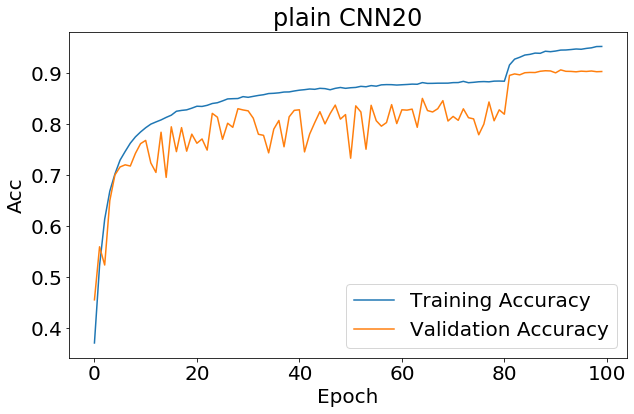

In [8]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']

fig1,ax1 = plt.subplots(1,1,figsize=(10,6))

ax1.plot(acc1, label='Training Accuracy')
ax1.plot(val_acc1, label='Validation Accuracy')

ax1.set_xlabel(r'Epoch', fontsize=20)
ax1.set_ylabel(r'Acc', fontsize=20)
ax1.set_title('plain CNN20', fontsize=24)

ax1.tick_params(labelsize=20)

ax1.legend(loc=4, fontsize=20)

plt.show()